# Цель
Целью работы является определить оптимальный подход для процесса кластеризации для формирования групп клиентов банка на основе данных клиентского профиля.

# Задачи
    1. Подготовка данных. Поиск лучше способа припроцессинга данных.
    2.  Выполнить кластризацию. Оценить качество кластеризаии.
    3. Сформировать группы на основе результатов кластеризации.

В данной работе будут использовать два алгоритма AgglomerativeClustering и KMeans. Оценка качества будет производиться метрикой silhouette_score. Будет установлено оптимальное число компанент для PCA и оптимальное число кластеров для каждого алгоритма.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})

from sklearn.manifold import TSNE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Reading data

In [2]:
work_linl = {'credit_train':r"D:\Datasets\credit\credit_train.csv"}

df = pd.read_csv(work_linl['credit_train'], sep=';')

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,"open_account_flg,,"
0,1,M,NaN,NaN,UMN,"59998,00",10,1.60,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,"0,"
1,2,F,NaN,MAR,UMN,"10889,00",6,1.10,NaN,NaN,МОСКВА,NaN,2.0,0.0,"0,"
2,3,M,32.0,MAR,SPC,"10728,00",12,1.10,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,"0,"
3,4,F,27.0,NaN,SPC,"12009,09",12,1.10,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,"0,"
4,5,M,45.0,NaN,SPC,NaN,10,1.10,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,"0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,F,27.0,UNM,SPC,"64867,00",12,1.10,"0,535257",GRD,РЕСПУБЛИКА ТАТАРСТАН,40000.0,6.0,0.0,0
170742,170743,F,24.0,MAR,SPC,"17640,00",6,1.60,"0,573287",SCH,САНКТ-ПЕТЕРБУРГ Г,30000.0,1.0,0.0,0
170743,170744,F,31.0,UNM,SPC,"27556,47",10,1.32,"0,416098",GRD,ПРИМОРСКИЙ КРАЙ,40000.0,1.0,0.0,0
170744,170745,F,53.0,DIV,PNA,"6189,00",12,1.10,"0,482595",SCH,ПЕНЗЕНСКАЯ ОБЛ,31000.0,2.0,0.0,0


## Data missing

In [4]:
df.rename(columns={'open_account_flg,,':'open_account_flg'}, inplace=True)
df.drop(inplace=True, columns='client_id')

In [5]:
df

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
41202,F,45.0,DIV,SPC,"30677,90",12,1.10,"0,471652",SCH,ОБЛ КЕМЕРОВСКАЯ,30000.0,0.0,0.0,0
157836,M,32.0,UNM,SPC,"11979,00",10,1.43,"0,558558",GRD,САНКТ-ПЕТЕРБУРГ,35000.0,2.0,0.0,0
113314,F,39.0,MAR,SPC,"19128,00",12,1.60,"0,606485",SCH,ОБЛ МОСКОВСКАЯ,30000.0,3.0,0.0,0
158150,F,50.0,MAR,SPC,"15354,44",10,1.60,"0,521949",SCH,СМОЛЕНСКАЯ ОБЛАСТЬ,28000.0,0.0,0.0,0
122652,F,31.0,DIV,UMN,"6563,00",10,1.40,"0,492524",GRD,ОБЛ МОСКОВСКАЯ,60000.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61958,M,35.0,DIV,SPC,"13088,00",10,1.10,"0,489162",SCH,ОБЛ КЕМЕРОВСКАЯ,40000.0,1.0,0.0,0
124237,F,34.0,DIV,SPC,"21904,00",4,1.10,"0,383759",GRD,ОБЛ ВОРОНЕЖСКАЯ,42000.0,4.0,0.0,0
26272,M,26.0,UNM,SPC,"10789,00",6,1.60,"0,423855",GRD,ТЮМЕНСКАЯ ОБЛ,45000.0,2.0,0.0,0
77663,F,44.0,WID,SPC,"25135,00",10,1.10,"0,457241",GRD,ОБЛ НОВОСИБИРСКАЯ,28000.0,4.0,0.0,0


In [6]:
# living_region
stop_words = ['АО', 'КРАЙ', 'РЕСПУБЛИКА', 'Г', 'АОБЛ', 'ОКРУГ', 'ЭЛ', 'ОБЛ', 'РЕСП']

def del_words_regions(arg):
    arg = re.sub(r"[\/\/\\\.,(0)\-']", ' ', str(arg))
    words = re.split(' ', arg)
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return ' '.join(new_words)

pd.options.display.max_rows = 310
regions = df['living_region'].unique()
regions = pd.Series(data=regions, name='regions', index=regions)

list_uniqie_words_from_regions = {re.sub(pattern=r"[\/\/\\\.,(0)\-']",
                                         repl='',
                                         string=j) for www in map(lambda x: x.split(' ') if type(x) is not float else [], regions.values) for j in www}

In [7]:
regions = regions.map(del_words_regions)

In [8]:
regions

ОБЛ КЕМЕРОВСКАЯ                                                    КЕМЕРОВСКАЯ
САНКТ-ПЕТЕРБУРГ                                                САНКТ ПЕТЕРБУРГ
ОБЛ МОСКОВСКАЯ                                                      МОСКОВСКАЯ
СМОЛЕНСКАЯ ОБЛАСТЬ                                          СМОЛЕНСКАЯ ОБЛАСТЬ
КРАСНОЯРСКИЙ КРАЙ                                                 КРАСНОЯРСКИЙ
СВЕРДЛОВСКАЯ ОБЛ                                                  СВЕРДЛОВСКАЯ
МОСКВА Г                                                                МОСКВА
САМАРСКАЯ ОБЛАСТЬ                                            САМАРСКАЯ ОБЛАСТЬ
КРАСНОДАРСКИЙ КРАЙ                                               КРАСНОДАРСКИЙ
САНКТ-ПЕТЕРБУРГ Г                                              САНКТ ПЕТЕРБУРГ
РОСТОВСКАЯ ОБЛ                                                      РОСТОВСКАЯ
ВОЛОГОДСКАЯ ОБЛАСТЬ                                        ВОЛОГОДСКАЯ ОБЛАСТЬ
ОБЛ ВОЛОГОДСКАЯ                                     

In [9]:
regions['РЕСП. САХА (ЯКУТИЯ)'] = 'САХА' 
regions['ТЮМЕНСКАЯ ОБЛАСТЬ'] = 'ТЮМЕНСКАЯ'
regions['ТВЕРСКАЯ ОБЛАСТЬ'] = 'ТВЕРСКАЯ'
regions['ЯРОСЛАВСКАЯ ОБЛАСТЬ'] = 'ЯРОСЛАВСКАЯ'
regions['РЕСП ЧЕЧЕНСКАЯ'] = 'ЧЕЧЕНСКАЯ'
regions['ТУЛЬСКАЯ ОБЛАСТЬ'] = 'ТУЛЬСКАЯ'
regions['СМОЛЕНСКАЯ ОБЛАСТЬ'] = 'СМОЛЕНСКАЯ'
regions['САМАРСКАЯ ОБЛАСТЬ'] = 'САМАРСКАЯ'
regions['ОРЛОВСКАЯ ОБЛАСТЬ'] = 'ОРЛОВСКАЯ'
regions['ТОМСКАЯ ОБЛАСТЬ'] = 'ТОМСКАЯ'
regions['САРАТОВСКАЯ ОБЛАСТЬ'] = 'САРАТОВСКАЯ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ МАНСИЙСКИЙ'
regions['БАШКОРТОСТАН'] = 'БАШКОРТОСТАН'
regions['ПСКОВСКАЯ ОБЛАСТЬ'] = 'ПСКОВСКАЯ'
regions['ВОЛОГОДСКАЯ ОБЛАСТЬ'] = 'ВОЛОГОДСКАЯ'
regions['САХА /ЯКУТИЯ/ РЕСП'] = 'САХА' 
regions['ОМСКАЯ ОБЛАСТЬ'] = 'ОМСКАЯ'
regions['АРХАНГЕЛЬСКАЯ ОБЛАСТЬ'] = 'АРХАНГЕЛЬСКАЯ'
regions['РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯ ОСЕТИЯ АЛАНИЯ'
regions['ПЕНЗЕНСКАЯ ОБЛАСТЬ'] = 'ПЕНЗЕНСКАЯ'
regions['УЛЬЯНОВСКАЯ ОБЛАСТЬ'] = 'УЛЬЯНОВСКАЯ'
regions['САХАЛИНСКАЯ ОБЛАСТЬ'] = 'САХАЛИНСКАЯ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['МОСКОВСКАЯ ОБЛАСТЬ'] = 'МОСКОВСКАЯ'
regions['ОРЕНБУРГСКАЯ ОБЛАСТЬ'] = 'ОРЕНБУРГСКАЯ'
regions['РЯЗАНСКАЯ ОБЛАСТЬ'] = 'РЯЗАНСКАЯ'
regions['ТАМБОВСКАЯ ОБЛАСТЬ'] = 'ТАМБОВСКАЯ'
regions['АСТРАХАНСКАЯ ОБЛАСТЬ'] = 'АСТРАХАНСКАЯ'
regions['СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ РЕСП'] = 'СЕВЕРНАЯ ОСЕТИЯ АЛАНИЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП САХА /ЯКУТИЯ/'] = 'САХА' 
regions['ЛЕНИНГРАДСКАЯ ОБЛАСТЬ'] = 'ЛЕНИНГРАДСКАЯ'
regions['МУРМАНСКАЯ ОБЛАСТЬ'] = 'МУРМАНСКАЯ'
regions['КЕМЕРОВСКАЯ ОБЛАСТЬ'] = 'КЕМЕРОВСКАЯ'
regions['КУРГАНСКАЯ ОБЛАСТЬ'] = 'КУРГАНСКАЯ'
regions['ВОЛГОГРАДСКАЯ ОБЛАСТЬ'] = 'ВОЛГОГРАДСКАЯ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯ ОСЕТИЯ АЛАНИЯ'
regions['БЕЛГОРОДСКАЯ ОБЛАСТЬ'] = 'БЕЛГОРОДСКАЯ'
regions['ВЛАДИМИРСКАЯ ОБЛАСТЬ'] = 'ВЛАДИМИРСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'  
regions['АМУРСКАЯ ОБЛАСТЬ'] = 'АМУРСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['РОССИЯ'] = 'nan'
regions['ВОРОНЕЖСКАЯ ОБЛАСТЬ'] = 'ВОРОНЕЖСКАЯ'
regions['БРЯНСКАЯ ОБЛАСТЬ'] = 'БРЯНСКАЯ'
regions['98'] = 'САНКТ ПЕТЕРБУРГ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МЫТИЩИНСКИЙ'
regions['ИВАНОВСКАЯ ОБЛАСТЬ'] = 'ИВАНОВСКАЯ'
regions['КАЛУЖСКАЯ ОБЛАСТЬ'] = 'КАЛУЖСКАЯ'
regions['КОСТРОМСКАЯ ОБЛАСТЬ'] = 'КОСТРОМСКАЯ'
regions['ЛИПЕЦКАЯ ОБЛАСТЬ'] = 'ЛИПЕЦКАЯ'
regions['ЕВРЕЙСКАЯ АВТОНОМНАЯ'] = 'ЕВРЕЙСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКАЯ'
regions['НОВОСИБИРСКАЯ ОБЛАСТЬ'] = 'НОВОСИБИРСКАЯ'
regions['НОВГОРОДСКАЯ ОБЛАСТЬ'] = 'НОВГОРОДСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ГУСЬ ХРУСТАЛЬНЫЙ'
regions['КИРОВСКАЯ ОБЛАСТЬ'] = 'КИРОВСКАЯ'
regions['74'] = 'АДЫГЕЯ'
regions['МАГАДАНСКАЯ ОБЛАСТЬ'] = 'МАГАДАНСКАЯ'
regions['САХА /ЯКУТИЯ/'] = 'САХА'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['КУРСКАЯ ОБЛАСТЬ'] = 'КУРСКАЯ'
regions['КАЛИНИНГРАДСКАЯ ОБЛ.'] = 'КАЛИНИНГРАДСКАЯ'
regions['ЧЕЛЯБИНСКАЯ ОБЛАСТЬ'] = 'ЧЕЛЯБИНСКАЯ'
regions['РЕСП. БАШКОРТОСТАН'] = 'БАШКОРТОСТАН'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ МАНСИЙСКИЙ'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'ПРИВОЛЖСКИЙ'
regions['РОСТОВСКАЯ ОБЛАСТЬ'] = 'РОСТОВСКАЯ'
regions['ИРКУТСКАЯ ОБЛАСТЬ'] = 'ИРКУТСКАЯ'
regions['СВЕРДЛОВСКАЯ ОБЛАСТЬ'] = 'СВЕРДЛОВСКАЯ'
regions['НИЖЕГОРОДСКАЯ ОБЛАСТЬ'] = 'НИЖЕГОРОДСКАЯ'
regions['ОБЛ. ВЛАДИМИРСКАЯ'] = 'ВЛАДИМИРСКАЯ'
regions['КРАЙ. СТАВРОПОЛЬСКИЙ'] = 'СТАВРОПОЛЬСКИЙ'
regions['Г. МОСКВА'] = 'МОСКВА'
regions['Г. САНКТ-ПЕТЕРБУРГ'] = 'САНКТ ПЕТЕРБУРГ'
regions['ОБЛ. ВЛАДИМИРСКАЯ'] = 'ВЛАДИМИРСКАЯ'
regions['КРАЙ. СТАВРОПОЛЬСКИЙ'] = 'СТАВРОПОЛЬСКИЙ'
regions['КРАЙ. КРАСНОЯРСКИЙ'] = 'КРАСНОЯРСКИЙ'
regions['ОБЛ. МУРМАНСКАЯ'] = 'МУРМАНСКАЯ'
regions['РЕСП. КОМИ'] = 'КОМИ'
regions['ОБЛ. ЛИПЕЦКАЯ'] = 'ЛИПЕЦКАЯ'
regions['ОБЛ. СВЕРДЛОВСКАЯ'] = 'СВЕРДЛОВСКАЯ'
regions['ОБЛ. НОВОСИБИРСКАЯ'] = 'НОВОСИБИРСКАЯ'
regions['ОБЛ. КУРГАНСКАЯ'] = 'КУРГАНСКАЯ'
regions['ОБЛ. БЕЛГОРОДСКАЯ'] = 'БЕЛГОРОДСКАЯ'
regions['ВОЛОГОДСКАЯ ОБЛ.'] = 'ВОЛОГОДСКАЯ'
regions['ОБЛ. ЧЕЛЯБИНСКАЯ'] = 'ЧЕЛЯБИНСКАЯ'
regions['КРАЙ. ПЕРМСКИЙ'] = 'ПЕРМСКИЙ'
regions['ОБЛ. КИРОВСКАЯ'] = 'КИРОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'

df['living_region'] = df['living_region'].map(regions)
df.living_region.unique()

array(['КЕМЕРОВСКАЯ', 'САНКТ ПЕТЕРБУРГ', 'МОСКОВСКАЯ', 'СМОЛЕНСКАЯ',
       'КРАСНОЯРСКИЙ', 'СВЕРДЛОВСКАЯ', 'МОСКВА', 'САМАРСКАЯ',
       'КРАСНОДАРСКИЙ', 'РОСТОВСКАЯ', 'ВОЛОГОДСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'КОМИ', 'СТАВРОПОЛЬСКИЙ', 'БАШКОРТОСТАН', 'АРХАНГЕЛЬСКАЯ',
       'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ', 'ТВЕРСКАЯ', 'РЯЗАНСКАЯ', 'ПЕРМСКИЙ',
       'ТУЛЬСКАЯ', 'ЧЕЛЯБИНСКАЯ', 'ТАТАРСТАН', 'ХАНТЫ МАНСИЙСКИЙ',
       'КАРАЧАЕВО ЧЕРКЕССКАЯ', 'МОРДОВИЯ', 'УДМУРТСКАЯ', 'КУРСКАЯ',
       'ВОЛГОГРАДСКАЯ', 'НОВОСИБИРСКАЯ', 'АСТРАХАНСКАЯ', 'ТЮМЕНСКАЯ',
       'ИРКУТСКАЯ', 'ТЫВА', 'НИЖЕГОРОДСКАЯ', 'МАРИЙ',
       'КАБАРДИНО БАЛКАРСКАЯ', 'КАРЕЛИЯ', 'САРАТОВСКАЯ', 'ЯМАЛО НЕНЕЦКИЙ',
       'БРЯНСКАЯ', 'АЛТАЙСКИЙ', 'ВОРОНЕЖСКАЯ', 'ПРИМОРСКИЙ', 'ОРЛОВСКАЯ',
       'ОРЕНБУРГСКАЯ', 'НОВГОРОДСКАЯ', 'ХАБАРОВСКИЙ', 'УЛЬЯНОВСКАЯ',
       'ПЕНЗЕНСКАЯ', 'ИВАНОВСКАЯ', 'АМУРСКАЯ', 'КУРГАНСКАЯ', 'КИРОВСКАЯ',
       'САХА', 'КАЛУЖСКАЯ', 'ТОМСКАЯ', 'КАЛИНИНГРАДСКАЯ', 'МУРМАНСКАЯ',
       'ОМСКАЯ', 'ЛИПЕЦКАЯ', 'СЕВЕР

In [10]:
print('Число пользователей, у которых не указан регион проживания: ', len(df[df.living_region == 'nan']))

# число не большое -- удаляю
df.drop(index=df[df.living_region == 'nan'].index, inplace=True) 

Число пользователей, у которых не указан регион проживания:  65


In [11]:
# gender
m = df['gender'].isna()
print(m[m == True])

Series([], Name: gender, dtype: bool)


In [12]:
# tariff_id

m = df['tariff_id'].isna() # маска
print(m[m == True])

Series([], Name: tariff_id, dtype: bool)


In [13]:
df.tariff_id = df.tariff_id.map(lambda x: str(x))

In [14]:
m_val_c = df.tariff_id.value_counts()
m_val_c

1.1     20292
1.6     11482
1.32     4535
1.4      3150
1.5      2196
1.9      1670
1.43     1149
1.3       963
1.16      932
1.44      647
1.19      635
1.0       614
1.2       361
1.7       308
1.17      195
1.21      181
1.94      131
1.23      109
1.22      107
1.91       99
1.24       95
1.41       44
1.25       17
1.18       11
1.26        4
1.52        3
1.48        2
1.28        2
1.27        1
Name: tariff_id, dtype: int64

In [15]:
m_val_c = m_val_c < 500
index = m_val_c[m_val_c == True].index
df.tariff_id = df.tariff_id.map(lambda x: '1.99' if x in index else x)

In [16]:
# job_position

m = df['job_position'].isna() # маска
print(m[m == True])
print(pd.unique(df.job_position))

Series([], Name: job_position, dtype: bool)
['SPC' 'UMN' 'PNA' 'BIS' 'ATP' 'WRK' 'NOR' 'DIR' 'INP' 'BIU' 'WOI' 'WRP'
 'PNI' 'INV' 'HSK' 'PNV' 'PNS']


In [17]:
m_val_c = df.job_position.value_counts()
m_val_c

SPC    39413
UMN     5159
BIS     1637
PNA     1172
DIR     1092
ATP      817
WRK      195
NOR      152
WOI      107
INP       65
BIU       42
WRP       35
PNI       26
PNV       11
HSK        6
PNS        4
INV        2
Name: job_position, dtype: int64

In [18]:
m_val_c = m_val_c < 500
index = m_val_c[m_val_c == True].index
df.job_position = df.job_position.map(lambda x: 'OTHER' if x in index else x)

In [19]:
# marital_status

m = df['marital_status'].isna() # маска
k = m[m == True]
print(k)
index_del_k = k.index
df.drop(index=index_del_k, inplace=True)

Series([], Name: marital_status, dtype: bool)


In [20]:
# credit_sum

m = df.credit_sum.isna()
k = m[m == True]
print(k)
index_del_k = k.index
print(index_del_k)

# удаляю
df.drop(index=index_del_k, inplace=True)

# заменяю "," на "." преобразовываю тип в float
df.credit_sum = df.credit_sum.map(lambda x: str(x).replace(',', '.')).astype('float')

5    True
Name: credit_sum, dtype: bool
Int64Index([5], dtype='int64')


In [21]:
# score_shk

m = df.score_shk.isna()
k = m[m == True]
print(k)
index_del_k = k.index
print(index_del_k)

# удаляю объекты с nan
df.drop(index=index_del_k, inplace=True)

# заменяю "," на "." преобразовываю тип в float
df.score_shk = df.score_shk.map(lambda x: str(x).replace(',', '.')).astype('float')

1    True
6    True
8    True
Name: score_shk, dtype: bool
Int64Index([1, 6, 8], dtype='int64')


In [22]:
# education

m = df.education.isna()
k = m[m==True]
print(k)
index_del_k = k.index
print(index_del_k)

# удаляю объекты с nan
df.drop(index=index_del_k, inplace=True)

Series([], Name: education, dtype: bool)
Int64Index([], dtype='int64')


In [23]:
m_val_c = df.education.value_counts()
m_val_c

SCH    25555
GRD    21281
UGR     2902
PGR      162
ACD       31
Name: education, dtype: int64

In [24]:
# open_account_flg

m = df.open_account_flg.isna()
print('наличие nan: ', m[m== True])
print('уникальыне значения: ', pd.unique(df.open_account_flg))

наличие nan:  Series([], Name: open_account_flg, dtype: bool)
уникальыне значения:  ['0' 0 '1' 1]


In [25]:
df.open_account_flg = df.open_account_flg.map(lambda x: int(re.sub(r'[\,\.]', '', str(x)))).astype('object')
df.open_account_flg.unique()

array([0, 1], dtype=object)

In [26]:
# проверка на наличие nan

df.isna().sum()

gender                     0
age                        0
marital_status             0
job_position               0
credit_sum                 0
credit_month               0
tariff_id                  0
score_shk                  0
education                  0
living_region              0
monthly_income             0
credit_count            2748
overdue_credit_count    2748
open_account_flg           0
dtype: int64

In [27]:
# monthly_income

m = df.monthly_income.isna()
k = m[m == True]

df.drop(index=k.index, inplace=True)

In [28]:
df.isna().sum()

gender                     0
age                        0
marital_status             0
job_position               0
credit_sum                 0
credit_month               0
tariff_id                  0
score_shk                  0
education                  0
living_region              0
monthly_income             0
credit_count            2748
overdue_credit_count    2748
open_account_flg           0
dtype: int64

In [29]:
# credit_count
m = df.credit_count.isna()
t = df[m==True].index
df.drop(index=t, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47183 entries, 41202 to 164131
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                47183 non-null  object 
 1   age                   47183 non-null  float64
 2   marital_status        47183 non-null  object 
 3   job_position          47183 non-null  object 
 4   credit_sum            47183 non-null  float64
 5   credit_month          47183 non-null  int64  
 6   tariff_id             47183 non-null  object 
 7   score_shk             47183 non-null  float64
 8   education             47183 non-null  object 
 9   living_region         47183 non-null  object 
 10  monthly_income        47183 non-null  float64
 11  credit_count          47183 non-null  float64
 12  overdue_credit_count  47183 non-null  float64
 13  open_account_flg      47183 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 4.1+ MB


In [30]:
df.open_account_flg = df.open_account_flg.map(lambda x: int(x))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47183 entries, 41202 to 164131
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                47183 non-null  object 
 1   age                   47183 non-null  float64
 2   marital_status        47183 non-null  object 
 3   job_position          47183 non-null  object 
 4   credit_sum            47183 non-null  float64
 5   credit_month          47183 non-null  int64  
 6   tariff_id             47183 non-null  object 
 7   score_shk             47183 non-null  float64
 8   education             47183 non-null  object 
 9   living_region         47183 non-null  object 
 10  monthly_income        47183 non-null  float64
 11  credit_count          47183 non-null  float64
 12  overdue_credit_count  47183 non-null  float64
 13  open_account_flg      47183 non-null  int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 4.3+ MB


In [32]:
data = df.copy()
list_features_type_object = [i for i in df.columns if df[i].dtype == 'object']
list_features_type_number = [i for i in df.columns if df[i].dtype != 'object']

In [33]:
df

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
41202,F,45.0,DIV,SPC,30677.90,12,1.1,0.471652,SCH,КЕМЕРОВСКАЯ,30000.0,0.0,0.0,0
157836,M,32.0,UNM,SPC,11979.00,10,1.43,0.558558,GRD,САНКТ ПЕТЕРБУРГ,35000.0,2.0,0.0,0
113314,F,39.0,MAR,SPC,19128.00,12,1.6,0.606485,SCH,МОСКОВСКАЯ,30000.0,3.0,0.0,0
158150,F,50.0,MAR,SPC,15354.44,10,1.6,0.521949,SCH,СМОЛЕНСКАЯ,28000.0,0.0,0.0,0
122652,F,31.0,DIV,UMN,6563.00,10,1.4,0.492524,GRD,МОСКОВСКАЯ,60000.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61958,M,35.0,DIV,SPC,13088.00,10,1.1,0.489162,SCH,КЕМЕРОВСКАЯ,40000.0,1.0,0.0,0
124237,F,34.0,DIV,SPC,21904.00,4,1.1,0.383759,GRD,ВОРОНЕЖСКАЯ,42000.0,4.0,0.0,0
26272,M,26.0,UNM,SPC,10789.00,6,1.6,0.423855,GRD,ТЮМЕНСКАЯ,45000.0,2.0,0.0,0
77663,F,44.0,WID,SPC,25135.00,10,1.1,0.457241,GRD,НОВОСИБИРСКАЯ,28000.0,4.0,0.0,0


## Encoding
### LabelEncoder

In [35]:
# living_region

dict_top_regions = {
    'КРАСНОДАРСКИЙ': 37.3,
    'МОСКВА': 88.9,
    'САРАТОВСКАЯ': 32,
    'ВОЛГОГРАДСКАЯ': 31.6 ,
    'ЧЕЛЯБИНСКАЯ': 37,
    'СТАВРОПОЛЬСКИЙ': 32.5,
    'НИЖЕГОРОДСКАЯ': 36.1,
    'МОСКОВСКАЯ': 55.1,
    'ХАНТЫ МАНСИЙСКИЙ': 47.6,
    'САНКТ ПЕТЕРБУРГ': 65.3,
    'БАШКОРТОСТАН': 33.7,
    'АРХАНГЕЛЬСКАЯ': 21.8,
    'ПЕРМСКИЙ': 39.9,
    'КАРАЧАЕВО ЧЕРКЕССКАЯ': 30,
    'КАЛУЖСКАЯ': 40,
    'ВОЛОГОДСКАЯ': 12.2,
    'РОСТОВСКАЯ': 34,
    'УДМУРТСКАЯ': 34.8,
    'ИРКУТСКАЯ': 52.156,
    'ПРИВОЛЖСКИЙ': 31.990,
    'ТЮМЕНСКАЯ': 47.364,
    'БЕЛГОРОДСКАЯ': 26,
    'КОСТРОМСКАЯ': 19.906,
    'ХАКАСИЯ': 38.9,
    'ТАТАРСТАН': 38.332,
    'СВЕРДЛОВСКАЯ': 44,
    'ПСКОВСКАЯ': 36.4468,
    'ЗАБАЙКАЛЬСКИЙ':12.1656,
    'ОРЕНБУРГСКАЯ': 33.776,
    'ВОРОНЕЖСКАЯ': 30.525,
    'АСТРАХАНСКАЯ': 17.215,
    'НОВОСИБИРСКАЯ': 46.192,
    'КУРГАНСКАЯ': 37.477,
    'УЛЬЯНОВСКАЯ': 31.764,
    'МУРМАНСКАЯ':  66.4,
    'КРАСНОЯРСКИЙ': 49.4,
    'БУРЯТИЯ': 38,
    'САХА': 70.418,
    'АМУРСКАЯ':37.3677,
    'ХАБАРОВСКИЙ': 22.070,
    'ЯМАЛО НЕНЕЦКИЙ': 100.875,
    'САМАРСКАЯ': 34.857,
    'ТВЕРСКАЯ': 29.337,
    'ЯРОСЛАВСКАЯ': 32.685,
    'ВЛАДИМИРСКАЯ': 32.590,
    'ЛЕНИНГРАДСКАЯ': 45,
    'ОРЛОВСКАЯ':29.841,
    'КЕМЕРОВСКАЯ': 41,
    'ОМСКАЯ': 36.522,
    'ЧЕЧЕНСКАЯ':32,
    'КУРСКАЯ': 34.769,
    'ТУЛЬСКАЯ': 38.94,
    'АДЫГЕЯ': 26.915,
    'КОМИ': 54.789,
    'ПРИМОРСКИЙ': 46.157,
    'СМОЛЕНСКАЯ': 31.370,
    'КИРОВСКАЯ': 34.059,
    'ДАГЕСТАН': 24.229,
    'ПЕНЗЕНСКАЯ': 30.760,
    'КАРЕЛИЯ': 41.5,
    'ТОМСКАЯ': 38,
    'МАГАДАНСКАЯ': 47,
    'МАРИЙ': 30.1519,
    'ИВАНОВСКАЯ': 27.558,
    'ЕВРЕЙСКАЯ': 39.2415,
    'АЛТАЙСКИЙ': 28.690,
    'КАБАРДИНО БАЛКАРСКАЯ': 21.7,
    'ТАМБОВСКАЯ': 29.836,
    'ТЫВА': 35.647,
    'НОВГОРОДСКАЯ': 30.800,
    'ЛИПЕЦКАЯ': 35.6197,
    'СЕВЕРНАЯ ОСЕТИЯ АЛАНИЯ': 29.8,
    'РЯЗАНСКАЯ': 35.324,
    'САХАЛИНСКАЯ': 42,
    'ЧУВАШСКАЯ': 28.999,
    'КАМЧАТСКИЙ':44,
    'МОРДОВИЯ':17,
    'КАЛМЫКИЯ':27.4,
    'АЛТАЙ':35,
    'БРЯНСКАЯ':21,
    'КАЛИНИНГРАДСКАЯ': 36.448,
    'НЕНЕЦКИЙ':45,
    'ЧУКОТСКИЙ': 75,
    'ГОРЬКОВСКАЯ':36.174,
    'ИНГУШЕТИЯ':15,
    'ЧИТИНСКАЯ': 20,
    'МЫТИЩИНСКИЙ': 40,
    'ЭВЕНКИЙСКИЙ': 35,
    'КАМЧАТСКАЯ': 44,
    'ГУСЬ ХРУСТАЛЬНЫЙ': 45,
    'БРЯНСКИЙ': 21,
    'ДАЛЬНИЙ ВОСТОК':42.595,
    "ОРЁЛ": 29.841,
    'OTHER':0
}

# сортирую по возратсанию
list_regions = [i[0] for i in sorted(dict_top_regions.items(), key=lambda x:x[1], reverse=True)]

my_encoder = {i[1]:i[0] for i in enumerate(list_regions)}
df['living_region'] = df['living_region'].map(my_encoder)

In [36]:
# gender
labelencoder_gender = LabelEncoder()
df['gender'] = labelencoder_gender.fit_transform(df.gender)

# tariff_id
labelencoder_tariff_id = LabelEncoder()
df['tariff_id'] = labelencoder_tariff_id.fit_transform(df.tariff_id)

# job_position
labelencoder_job_position = LabelEncoder()
df['job_position'] = labelencoder_job_position.fit_transform(df.job_position)

# education
labelencoder_education = LabelEncoder()
df['education'] = labelencoder_education.fit_transform(df.education)

# marital_status
labelencoder_marital_status = LabelEncoder()
df['marital_status'] = labelencoder_marital_status.fit_transform(df.marital_status)

### account

In [37]:
dictionary_function={
    'age': np.mean,
    'marital_status': lambda x: x.value_counts().idxmax(),
    'job_position':lambda x: x.value_counts().idxmax(),
    'credit_sum': np.mean,
    'credit_month': np.mean,
    'tariff_id': lambda x: x.value_counts().idxmax(),
    'score_shk': np.mean,
    'education': lambda x: x.value_counts().idxmax(),
    'living_region': lambda x: x.value_counts().idxmax(),
    'monthly_income': np.mean,
    'credit_count': lambda x: x.value_counts().idxmax(),
    'overdue_credit_count': lambda x: x.value_counts().idxmax()}

In [38]:
df.groupby(['open_account_flg', 'gender']).agg(dictionary_function)

age  marital_status  job_position  \
open_account_flg gender                                            
0                0       38.338613               2             5   
                 1       35.742699               2             5   
1                0       38.943972               2             5   
                 1       35.250994               2             5   

                           credit_sum  credit_month  tariff_id  score_shk  \
open_account_flg gender                                                     
0                0       25928.524778     10.981617          1   0.465568   
                 1       26975.358466     10.933075          1   0.460031   
1                0       22032.196625     11.173394          1   0.472877   
                 1       23752.144038     11.102634          1   0.483025   

                         education  living_region  monthly_income  \
open_account_flg gender                                             
0                0               1              6    35776.641085   
                 1               3              6    45887.772281   
1                0               3              6    33630.164100   
                 1               3              6    44213.551690   

                         credit_count  overdue_credit_count  
open_account_flg gender                                      
0                0                1.0                   0.0  
                 1                1.0                   0.0  
1                0                1.0                   0.0  
                 1                1.0                   0.0

In [39]:
df

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
41202,0,45.0,1,5,30677.90,12,1,0.471652,3,24,30000.0,0.0,0.0,0
157836,1,32.0,3,5,11979.00,10,7,0.558558,1,5,35000.0,2.0,0.0,0
113314,0,39.0,2,5,19128.00,12,10,0.606485,3,6,30000.0,3.0,0.0,0
158150,0,50.0,2,5,15354.44,10,10,0.521949,3,63,28000.0,0.0,0.0,0
122652,0,31.0,1,6,6563.00,10,6,0.492524,1,6,60000.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61958,1,35.0,1,5,13088.00,10,1,0.489162,3,24,40000.0,1.0,0.0,0
124237,0,34.0,1,5,21904.00,4,1,0.383759,1,66,42000.0,4.0,0.0,0
26272,1,26.0,3,5,10789.00,6,10,0.423855,1,11,45000.0,2.0,0.0,0
77663,0,44.0,4,5,25135.00,10,1,0.457241,1,13,28000.0,4.0,0.0,0


## Data Preprocessing

In [40]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts()
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

overdue_credit_count: 95.22921%
0.0    44932
1.0     2226
2.0       22
3.0        3
Name: overdue_credit_count, dtype: int64



In [41]:
df.overdue_credit_count.value_counts()

0.0    44932
1.0     2226
2.0       22
3.0        3
Name: overdue_credit_count, dtype: int64

In [42]:
df.overdue_credit_count = df.overdue_credit_count.map(lambda x: 1.0 if x in [2.0, 3.0] else x)

In [43]:
df.overdue_credit_count.value_counts()

0.0    44932
1.0     2251
Name: overdue_credit_count, dtype: int64

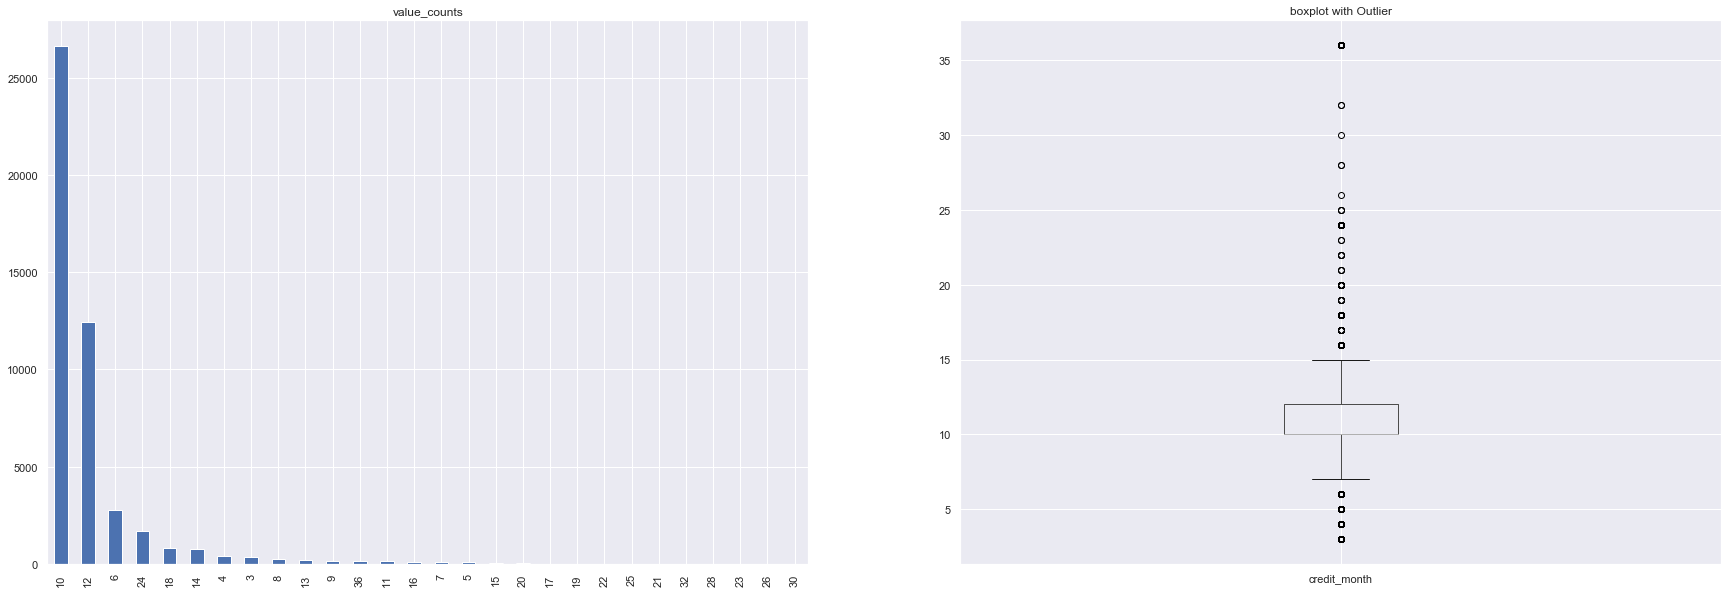

In [44]:
# credit_month
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 10))
df['credit_month'].value_counts().plot.bar(ax=ax[0])
df.boxplot(column='credit_month', figsize=(8, 8), ax=ax[1])
ax[0].set_title('value_counts')
ax[1].set_title('boxplot with Outlier');

In [45]:
counts = df['credit_month'].value_counts()
print(counts)

10    26620
12    12450
6      2795
24     1690
18      805
14      742
4       388
3       349
8       256
13      225
9       167
36      139
11      131
16      113
7       102
5        91
15       62
20       27
17        8
19        5
22        4
25        3
21        3
32        2
28        2
23        2
26        1
30        1
Name: credit_month, dtype: int64


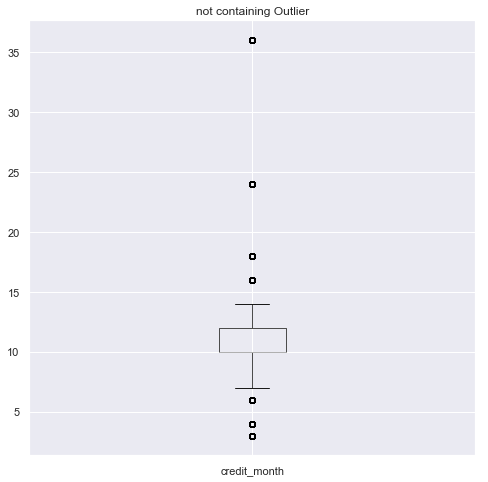

In [46]:
m = counts < 100

for i in m[m == True].index:
        df.drop(index=(df[df['credit_month'] == i].index), inplace=True)

ax = plt.subplot(111)
df.boxplot(column='credit_month', figsize=(8, 8), ax=ax)
ax.set_title('not containing Outlier');

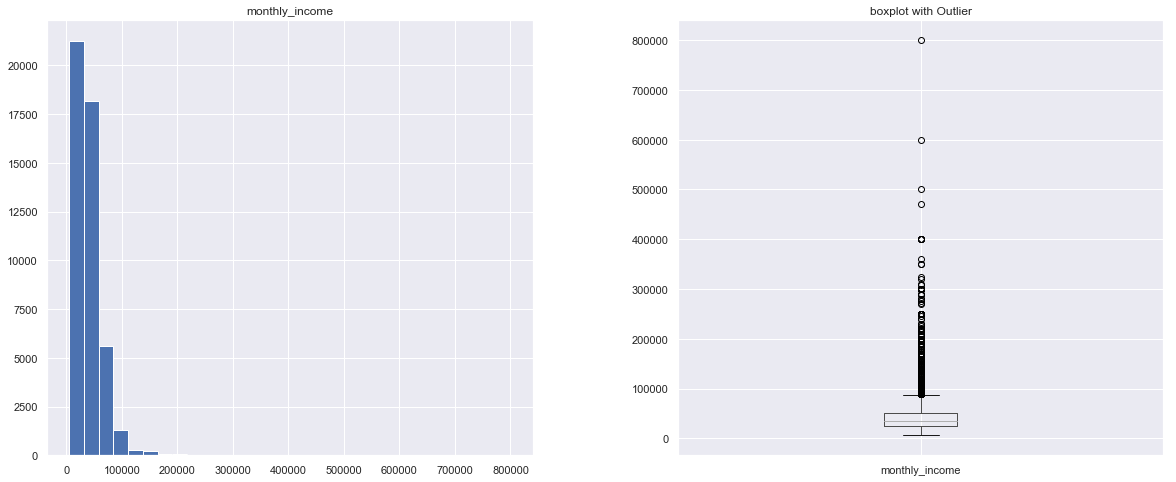

In [47]:
# monthly_income
# попробовать разбивать на группы все даныне по зарплатам
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))
df.hist(column='monthly_income', bins=30, ax=ax[0])
df.boxplot(column='monthly_income', figsize=(8, 8), ax=ax[1])
ax[1].set_title('boxplot with Outlier');

In [48]:
counts = df['monthly_income'].value_counts()
print(counts)

30000.0    4777
25000.0    4073
40000.0    3775
35000.0    3427
50000.0    3368
           ... 
27755.0       1
39132.0       1
17520.0       1
20100.0       1
15360.0       1
Name: monthly_income, Length: 850, dtype: int64


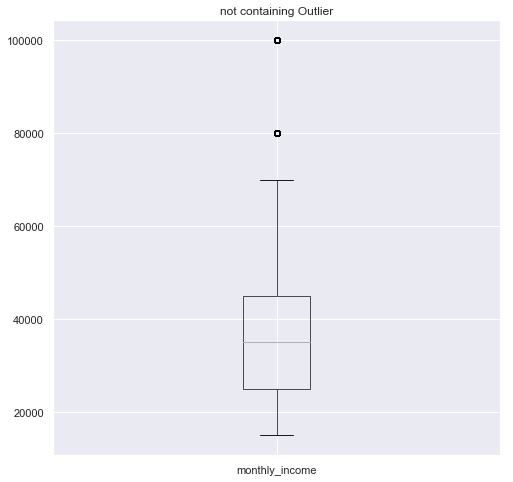

In [49]:
m = counts < 500
for i in m[m == True].index:
        df.drop(index=(df[df['monthly_income'] == i].index), inplace=True)
ax = plt.subplot(111)
df.boxplot(column='monthly_income', figsize=(8, 8), ax=ax)
ax.set_title('not containing Outlier');

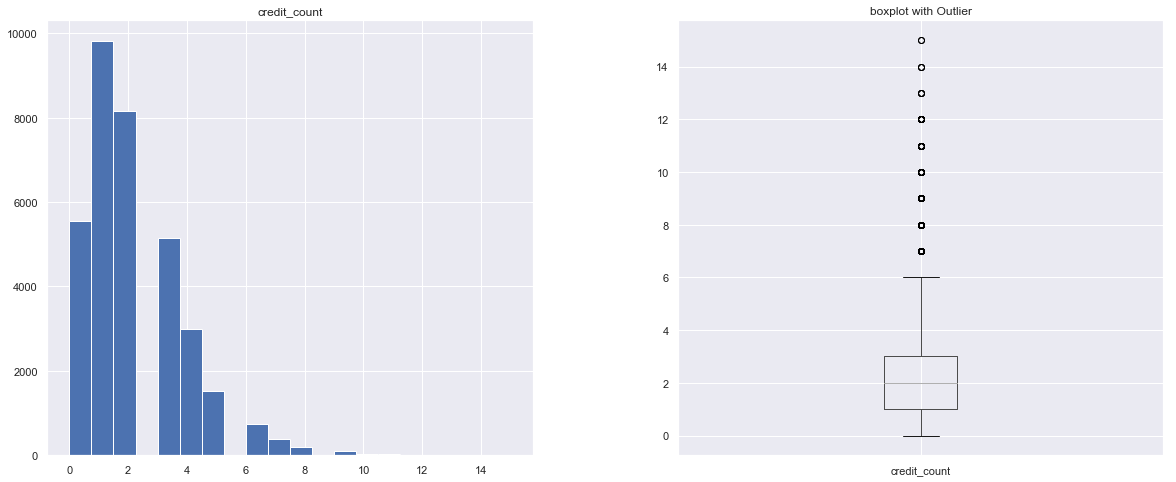

In [50]:
# credit_count
# попробовать разбивать на группы все даныне по зарплатам
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 8))
df.hist(column='credit_count', bins=20, ax=ax[0])
df.boxplot(column='credit_count', figsize=(8, 8), ax=ax[1])
ax[1].set_title('boxplot with Outlier');

In [51]:
counts = df['credit_count'].value_counts()
print(counts)

1.0     9814
2.0     8159
0.0     5547
3.0     5150
4.0     3001
5.0     1534
6.0      735
7.0      375
8.0      203
9.0       96
10.0      35
11.0      24
12.0      16
13.0       4
14.0       3
15.0       2
Name: credit_count, dtype: int64


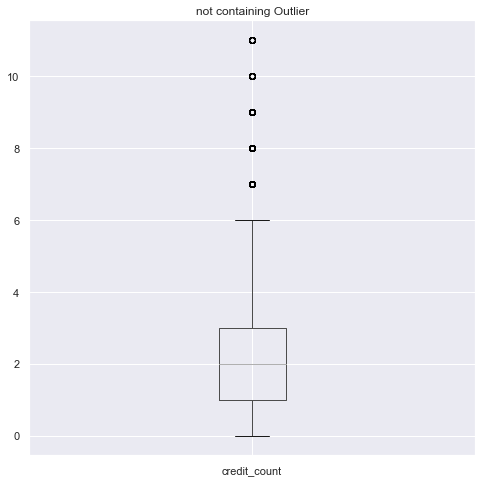

In [52]:
m = counts < 20
for i in m[m == True].index:
        df.drop(index=(df[df['credit_count'] == i].index), inplace=True)
ax = plt.subplot(111)
df.boxplot(column='credit_count', figsize=(8, 8), ax=ax)
ax.set_title('not containing Outlier');

## Train, Target and Living_region

In [73]:
target = df.open_account_flg
# X = df.drop(columns=['open_account_flg'])
X = df.copy()

In [74]:
X

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
41202,0,45.0,1,5,30677.90,12,1,0.471652,3,24,30000.0,0.0,0.0,0
157836,1,32.0,3,5,11979.00,10,7,0.558558,1,5,35000.0,2.0,0.0,0
113314,0,39.0,2,5,19128.00,12,10,0.606485,3,6,30000.0,3.0,0.0,0
158150,0,50.0,2,5,15354.44,10,10,0.521949,3,63,28000.0,0.0,0.0,0
122652,0,31.0,1,6,6563.00,10,6,0.492524,1,6,60000.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74744,0,34.0,1,1,12608.00,6,7,0.599155,4,76,40000.0,0.0,0.0,1
61958,1,35.0,1,5,13088.00,10,1,0.489162,3,24,40000.0,1.0,0.0,0
26272,1,26.0,3,5,10789.00,6,10,0.423855,1,11,45000.0,2.0,0.0,0
77663,0,44.0,4,5,25135.00,10,1,0.457241,1,13,28000.0,4.0,0.0,0


## StandardScaler


In [75]:
list_features_type_number

['age',
 'credit_sum',
 'credit_month',
 'score_shk',
 'monthly_income',
 'credit_count',
 'overdue_credit_count',
 'open_account_flg']

In [76]:
scalerX = StandardScaler()
X[['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count']] = scalerX.fit_transform(X[['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count']])

In [77]:
X

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
41202,0,0.862962,1,5,0.322992,0.294311,1,0.053298,3,24,-0.454823,-1.211397,0.0,0
157836,1,-0.453844,3,5,-0.872437,-0.275383,7,0.762907,1,5,-0.160564,-0.034734,0.0,0
113314,0,0.255205,2,5,-0.415398,0.294311,10,1.154243,3,6,-0.454823,0.553598,0.0,0
158150,0,1.369426,2,5,-0.656644,-0.275383,10,0.463986,3,63,-0.572527,-1.211397,0.0,0
122652,0,-0.555137,1,6,-1.218685,-0.275383,6,0.223723,1,6,1.310735,0.553598,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74744,0,-0.251259,1,1,-0.832225,-1.414773,7,1.094392,4,76,0.133696,-1.211397,0.0,1
61958,1,-0.149966,1,5,-0.801539,-0.275383,1,0.196272,3,24,0.133696,-0.623065,0.0,0
26272,1,-1.061601,3,5,-0.948515,-1.414773,10,-0.336976,1,11,0.427956,-0.034734,0.0,0
77663,0,0.761669,4,5,-0.031368,-0.275383,1,-0.064371,1,13,-0.572527,1.141930,0.0,0


In [78]:
X.overdue_credit_count.value_counts()

0.0    33046
1.0     1627
Name: overdue_credit_count, dtype: int64

In [79]:
living_region = X.living_region
X.drop(columns=['living_region'], inplace=True)

## PolynomialFeatures

In [80]:
X = PolynomialFeatures(degree=2).fit_transform(X)

## PCA

In [81]:
pca = PCA()
pca.fit_transform(X);

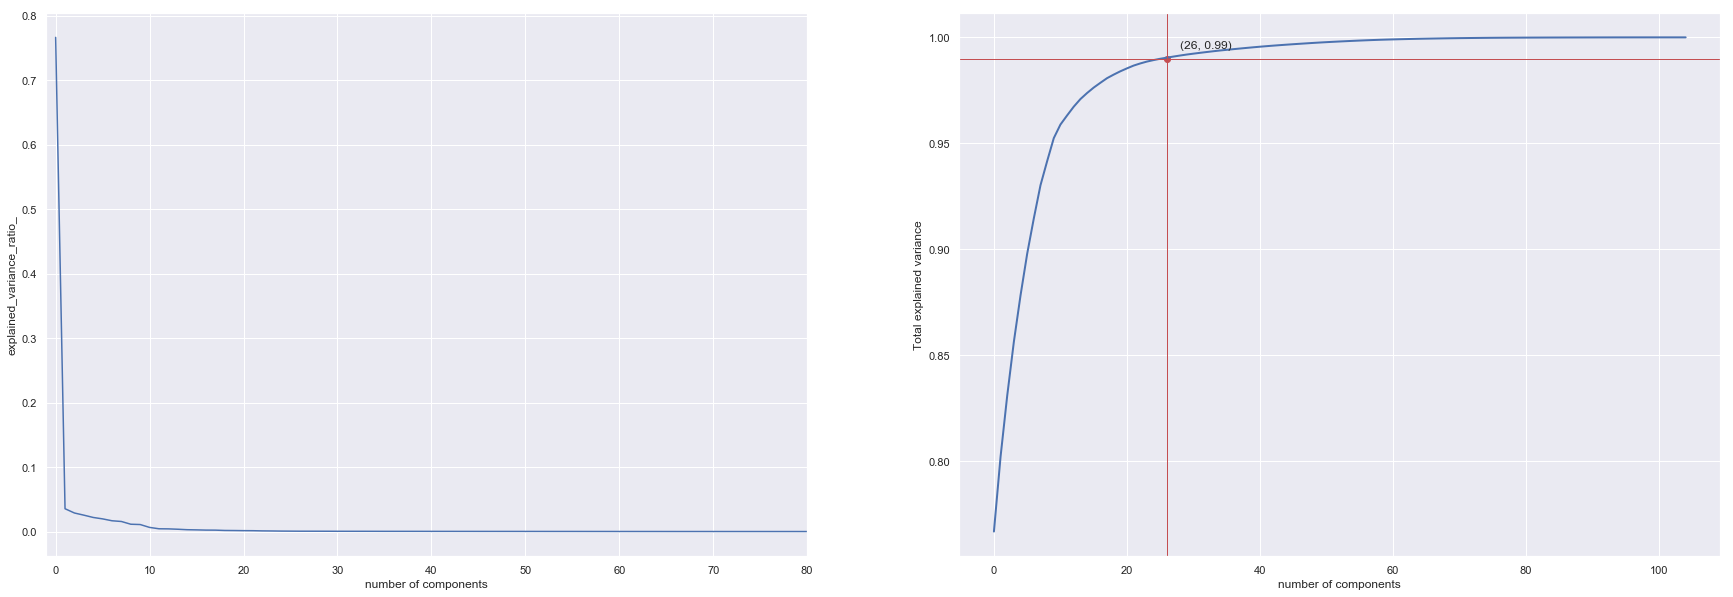

In [82]:
_, ax = plt.subplots(ncols=2, nrows=1, figsize=(30,10))
ax[0].plot(pca.explained_variance_ratio_)
ax[0].set_xlim(-1, 80);
ax[0].set_xlabel('number of components')
ax[0].set_ylabel('explained_variance_ratio_');

pca_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

ax[1].plot(pca_explained_variance_ratio, lw=2)
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('Total explained variance')
optimal = (np.where(pca_explained_variance_ratio ==
                    pca_explained_variance_ratio[pca_explained_variance_ratio>0.99][0])[0][0], 0.99)
ax[1].axvline(optimal[0], c='r', lw=1)
ax[1].axhline(optimal[1], c='r', lw=1)
ax[1].scatter(x=optimal[0], y=optimal[1], marker='o', c='r', )
ax[1].annotate(s='{label}'.format(label=optimal),
                 xy=(optimal[0] + 2, optimal[1] + 0.005));

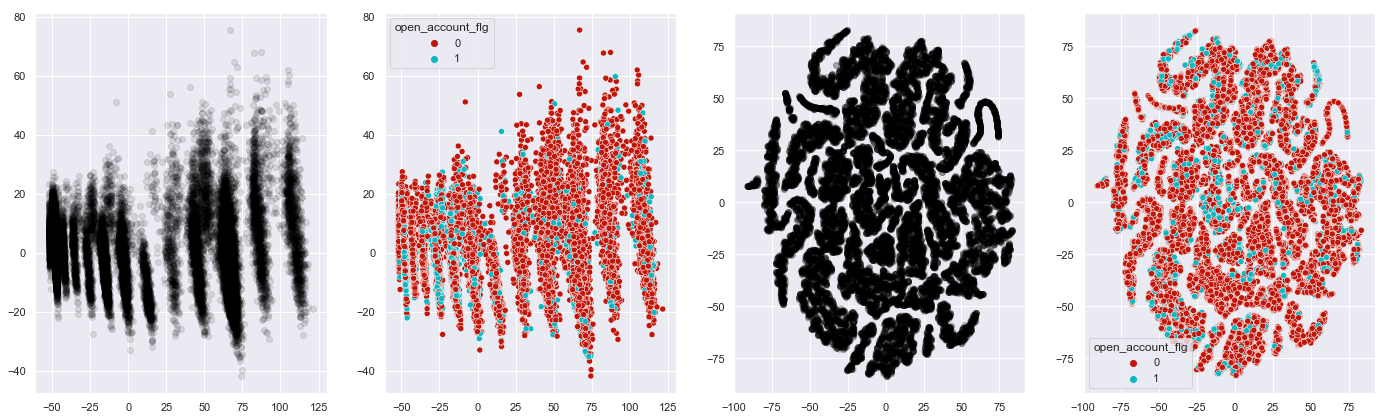

In [83]:
# PCA 2
def pca2():
    _, ax = plt.subplots(nrows=1, ncols=4, figsize=(24,7))
    palette = sns.hls_palette(2, l=.4, s=.9)
    
    # PC 2
    X_pca2 = PCA(n_components=2, random_state=26).fit_transform(X)
      
    ax[0].scatter(X_pca2[:, 0], y=X_pca2[:, 1], alpha=0.1, c='black');
    sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=target, palette=palette, ax=ax[1]);
    
    # TSNE
    X_tsne2 = TSNE().fit_transform(X_pca2)
    
    ax[2].scatter(X_tsne2[:, 0], y=X_tsne2[:, 1], alpha=0.1, c='black');
    sns.scatterplot(x=X_tsne2[:, 0], y=X_tsne2[:, 1], hue=target, palette=palette, ax=ax[3]);
pca2()

In [84]:
# PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X)

## TSNE

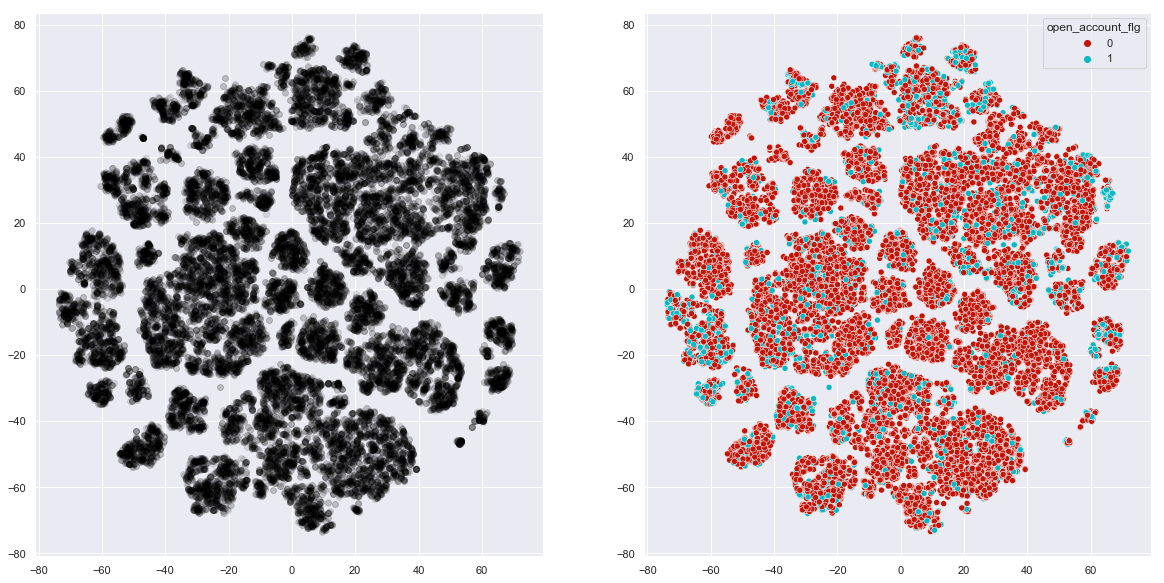

In [85]:
# Визуализация

TSNE
tsne = TSNE()
X_tsne = tsne.fit_transform(X_train)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
palette = sns.hls_palette(2, l=.4, s=.9)
ax[0].scatter(X_tsne[:, 0], y=X_tsne[:, 1], alpha=0.1, c='black');
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=target, palette=palette, ax=ax[1]);

## Modeling 

In [86]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [87]:
def clustering(model, n_clusters, X, X_visual):
    predict = model.fit_predict(X)
    
    if n_clusters:
        palette = sns.hls_palette(n_clusters, l=.4, s=.9) # цвета
    else:
        palette = None
    if X_visual is not False:
        fig, ax = plt.subplots(figsize=(7,7))
        sns.scatterplot(x=X_visual[:, 0], y=X_visual[:, 1], hue=predict, palette=palette, ax=ax);
    
    return predict

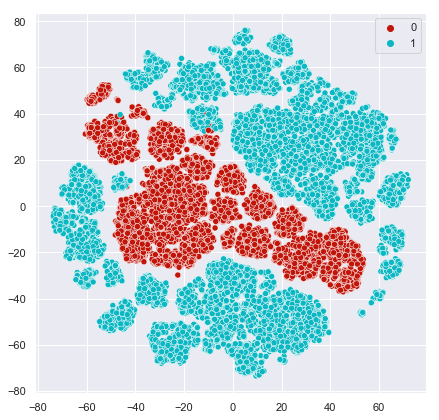

In [88]:
# KMeans
label_predictions_km2 = clustering(model=KMeans(n_clusters=2), n_clusters=2, X=X_train, X_visual=X_tsne)

In [89]:
# словарь функций
# dictionary_function={
#         'open': lambda x: (sum(x)/len(x))*100,
#         'close': lambda x: (sum(x)/len(x))*100,
#         'gender': lambda x: x.value_counts().idxmax(),
#         'age': np.mean,
#         'marital_status': lambda x: x.value_counts().idxmax(),
#         'job_position':lambda x: x.value_counts().idxmax(),
#         'credit_sum': np.mean,
#         'credit_month': np.mean,
#         'tariff_id': lambda x: x.value_counts().idxmax(),
#         'score_shk': np.mean,
#         'education': lambda x: x.value_counts().idxmax(),
#         'living_region': lambda x: x.value_counts().idxmax(),
#         'monthly_income': np.mean,
#         'credit_count': lambda x: x.value_counts().idxmax(),
#         'overdue_credit_count': lambda x: x.value_counts().idxmax()}
#     lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)

def function_data_grouping(dataindex, data, label_predictions, function=False): 
    """
    Функция для построения групп клиентов
    data: данные для группировки
    label_predictions: обозначения кластеров
    function: словарь функций
    return: Если function=False - два объекта: 1 группы по кластером категориальных признаков, 2 группы по кластерам по числовым
            Если function=True - один объект: группа усредненных параметров по словарю функций dictionary_function
    """
    client_profile = data.loc[dataindex]
    client_profile['number_claster'] = label_predictions
    client_profile.insert(loc=2, column='open', value=client_profile['open_account_flg'].values)
    client_profile.insert(loc=3, column='close', value=client_profile['open_account_flg'].map(lambda x: 0 if x == 1 else 1).values)
    client_profile.drop(columns=['open_account_flg'], inplace=True)
    client_profile.open = client_profile.open.astype(np.uint8)
    client_profile.close = client_profile.close.astype(np.uint8)
    if function:
        return client_profile.groupby(['number_claster', 'gender']).agg(function)
    else:
        ...
        return customer_profile_by_category, customer_profile_by_number

In [90]:
dictionary_function={
        'open': lambda x: (sum(x)/len(x))*100,
        'close': lambda x: (sum(x)/len(x))*100,
        'age': np.mean,
        'marital_status': lambda x: x.value_counts().idxmax(),
        'job_position':lambda x: x.value_counts().idxmax(),
        'credit_sum': np.mean,
        'credit_month': np.mean,
        'tariff_id': lambda x: x.value_counts().idxmax(),
        'score_shk': np.mean,
        'education': lambda x: x.value_counts().idxmax(),
        'living_region': lambda x: x.value_counts().idxmax(),
        'monthly_income': np.mean,
        'credit_count': lambda x: x.value_counts().idxmax(),
        'overdue_credit_count': lambda x: x.value_counts().idxmax()}

function_data_grouping(dataindex=df.index, data=data, label_predictions=label_predictions_km2, function=dictionary_function)

open      close        age marital_status  \
number_claster gender                                                   
0              F        8.113998  91.886002  36.232691            MAR   
               M       12.902188  87.097812  33.890766            MAR   
1              F       17.883403  82.116597  38.215511            MAR   
               M       19.967474  80.032526  36.277738            MAR   

                      job_position    credit_sum  credit_month tariff_id  \
number_claster gender                                                      
0              F               SPC  28878.300969     10.869237       1.6   
               M               SPC  29043.341654     10.771879       1.6   
1              F               SPC  23791.500487     11.053221       1.1   
               M               SPC  23846.391232     11.039574       1.1   

                       score_shk education living_region  monthly_income  \
number_claster gender                                                      
0              F        0.528571       SCH    МОСКОВСКАЯ    33970.159262   
               M        0.532006       SCH    МОСКОВСКАЯ    42219.272844   
1              F        0.431990       GRD    МОСКОВСКАЯ    33526.960784   
               M        0.427569       SCH    МОСКОВСКАЯ    41567.853271   

                       credit_count  overdue_credit_count  
number_claster gender                                      
0              F                1.0                   0.0  
               M                1.0                   0.0  
1              F                1.0                   0.0  
               M                1.0                   0.0

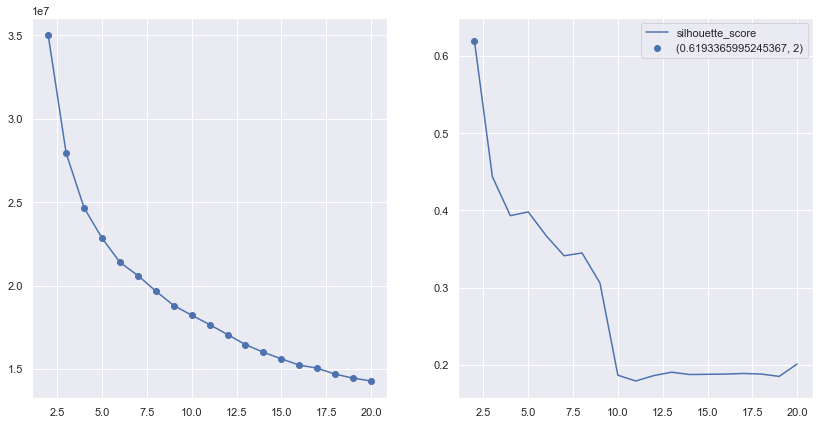

In [91]:
# Inertia, silhouette_score

def search_number_claster(n, X):
    _, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
    y_inertia, y_sil = [], []
    x = range(2, n+1)
    for number in x:
        model = KMeans(n_clusters=number)
        label_predictions = model.fit_predict(X)
        y_inertia.append(model.inertia_)
        y_sil.append(silhouette_score(X=X[:5000], labels=label_predictions[:5000]))

    optimal = max(y_sil)
    max_x = x[y_sil.index(optimal)]
    ax[0].plot(x, y_inertia,'o-', label='Inertia')
    ax[1].scatter(x=max_x, y=optimal, label='{}'.format((optimal,max_x)) )
    ax[1].plot(x, y_sil, label='silhouette_score')
    plt.legend();

search_number_claster(n=20, X=X_train)

In [72]:
# Судя по всему самое оптимальноче число кластеров лежит в преелах от 2-10. Так в этом пределе более менее приличная метрика силуэт и в этом пределе начинается спат по межкластерному ратсоянию.

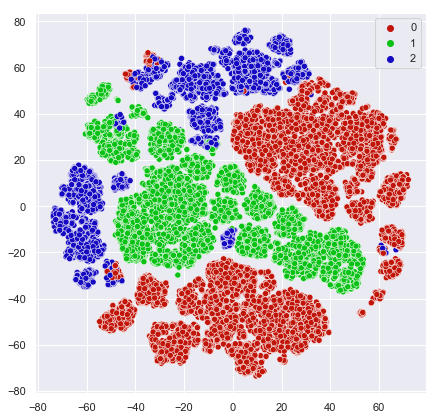

In [94]:
label_predictions_km10 = clustering(model=KMeans(n_clusters=3), n_clusters=3, X=X_train, X_visual=X_tsne)

In [96]:
function_data_grouping(dataindex=df.index, data=data, label_predictions=label_predictions_km10, function=dictionary_function)

open      close        age marital_status  \
number_claster gender                                                   
0              F       15.376147  84.623853  38.500306            MAR   
               M       17.574446  82.425554  36.482438            MAR   
1              F        8.124026  91.875974  36.226572            MAR   
               M       12.938050  87.061950  33.859990            MAR   
2              F       23.278117  76.721883  37.438535            MAR   
               M       25.022026  74.977974  35.723054            MAR   

                      job_position    credit_sum  credit_month tariff_id  \
number_claster gender                                                      
0              F               SPC  24389.801319     11.349358       1.1   
               M               SPC  24333.640457     11.266989       1.1   
1              F               SPC  28724.519738     10.896241       1.6   
               M               SPC  28841.568517     10.797044       1.6   
2              F               SPC  22911.911831     10.294101      1.32   
               M               SPC  23376.340420     10.454919      1.32   

                       score_shk education living_region  monthly_income  \
number_claster gender                                                      
0              F        0.423102       GRD    МОСКОВСКАЯ    33524.036697   
               M        0.417895       SCH    МОСКОВСКАЯ    41512.598626   
1              F        0.528542       SCH    МОСКОВСКАЯ    33805.473757   
               M        0.532060       SCH    МОСКОВСКАЯ    42033.881415   
2              F        0.458542       GRD    МОСКОВСКАЯ    33834.931706   
               M        0.455781       SCH    МОСКОВСКАЯ    42060.499266   

                       credit_count  overdue_credit_count  
number_claster gender                                      
0              F                1.0                   0.0  
               M                1.0                   0.0  
1              F                1.0                   0.0  
               M                1.0                   0.0  
2              F                1.0                   0.0  
               M                1.0                   0.0

In [78]:
# Стоит обратить внимание что кластеры разбильс по tarifu! 

In [79]:
# В каком класторе боль всего выдают кредитов


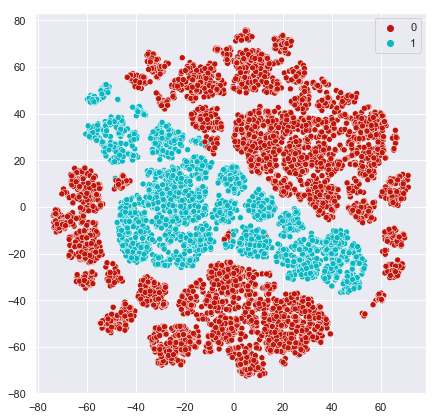

In [97]:
# AgglomerativeClustering

label_predictions_agg2 = clustering(model=AgglomerativeClustering(n_clusters=2), n_clusters=2, X=X_train[:8000], X_visual=X_tsne[:8000])

In [98]:
function_data_grouping(dataindex=df[:8000].index, data=data, label_predictions=label_predictions_agg2, function=dictionary_function)

open      close        age marital_status  \
number_claster gender                                                   
0              F       18.208844  81.791156  38.223709            MAR   
               M       19.809448  80.190552  36.371973            MAR   
1              F        9.057164  90.942836  36.752784            MAR   
               M       13.513514  86.486486  33.774082            MAR   

                      job_position    credit_sum  credit_month tariff_id  \
number_claster gender                                                      
0              F               SPC  23659.761379     11.002973       1.1   
               M               SPC  24108.131370     10.940453       1.1   
1              F               SPC  28372.433460     10.858946       1.6   
               M               SPC  29004.992481     10.796258       1.6   

                       score_shk education living_region  monthly_income  \
number_claster gender                                                      
0              F        0.434720       GRD    МОСКОВСКАЯ    33528.056485   
               M        0.428764       SCH    МОСКОВСКАЯ    41809.051211   
1              F        0.525811       SCH    МОСКОВСКАЯ    34220.489978   
               M        0.529959       SCH    МОСКОВСКАЯ    41601.524602   

                       credit_count  overdue_credit_count  
number_claster gender                                      
0              F                1.0                   0.0  
               M                1.0                   0.0  
1              F                1.0                   0.0  
               M                1.0                   0.0

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_train[:8000])

dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
plt.ylabel("Кластерное расстояние");

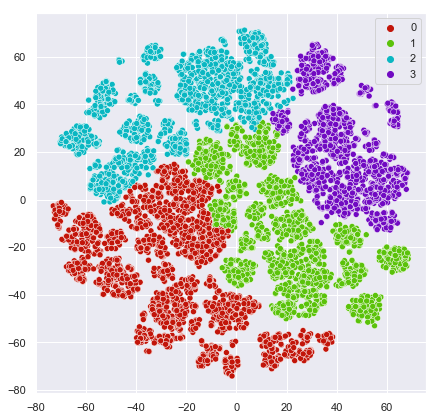

In [83]:
label_predictions_agg4 = clustering(model=AgglomerativeClustering(n_clusters=4), n_clusters=4, X=X_tsne[:8000], X_visual=X_tsne[:8000])

In [86]:
function_data_grouping(dataindex=df[:8000].index, data=data, label_predictions=label_predictions_agg4, function=dictionary_function)

open      close        age marital_status  \
number_claster gender                                                   
0              F       20.590717  79.409283  37.975527            MAR   
               M       20.995334  79.004666  35.806376            MAR   
1              F        9.738503  90.261497  36.899910            MAR   
               M       13.241107  86.758893  34.796443            MAR   
2              F       17.538760  82.461240  38.596899            MAR   
               M       19.495413  80.504587  36.930046            MAR   
3              F       11.095506  88.904494  37.375000            MAR   
               M       15.151515  84.848485  33.955808            MAR   

                      job_position    credit_sum  credit_month tariff_id  \
number_claster gender                                                      
0              F               SPC  23007.131595     10.349367      1.32   
               M               SPC  23627.820280     10.410575       1.1   
1              F               SPC  25348.907087     10.185753       1.1   
               M               SPC  25769.699684     10.046443       1.6   
2              F               SPC  25388.340640     12.168605       1.1   
               M               SPC  26046.590252     12.153670       1.1   
3              F               SPC  28525.181601     11.401685       1.6   
               M               SPC  29552.585114     11.344697       1.6   

                       score_shk education    living_region  monthly_income  \
number_claster gender                                                         
0              F        0.444360       SCH       МОСКОВСКАЯ    33432.911392   
               M        0.435761       SCH       МОСКОВСКАЯ    42572.317263   
1              F        0.476204       GRD  САНКТ ПЕТЕРБУРГ    33993.688007   
               M        0.479985       GRD       МОСКОВСКАЯ    40581.027668   
2              F        0.421674       GRD       МОСКОВСКАЯ    33968.992248   
               M        0.413995       GRD       МОСКОВСКАЯ    42899.082569   
3              F        0.545303       SCH       МОСКОВСКАЯ    33632.022472   
               M        0.552587       SCH       МОСКОВСКАЯ    40560.606061   

                       credit_count  overdue_credit_count  
number_claster gender                                      
0              F                1.0                   0.0  
               M                1.0                   0.0  
1              F                1.0                   0.0  
               M                1.0                   0.0  
2              F                1.0                   0.0  
               M                1.0                   0.0  
3              F                1.0                   0.0  
               M                1.0                   0.0

In [87]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

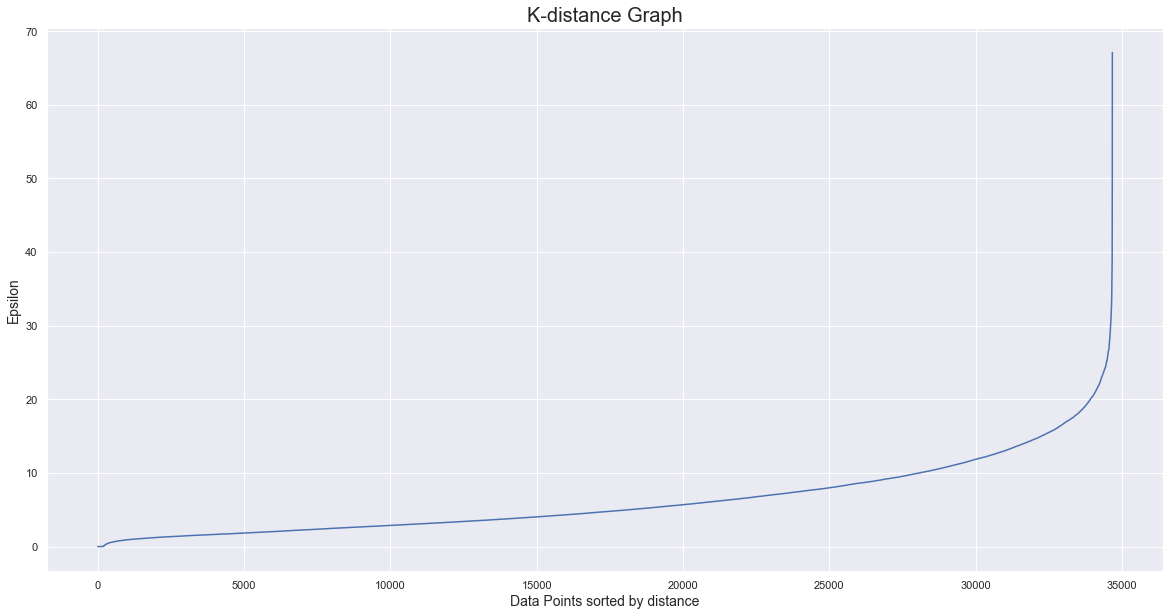

In [88]:
# Plotting K-distance Graph

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [183]:
dbscan = DBSCAN(eps=30, min_samples=180)
dbscan.fit(X_train[:8000])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=180, n_jobs=None, p=None)

In [184]:
t = data.loc[df[:8000].index]
t['DBSCAN_opt_labels']=dbscan.labels_
t['DBSCAN_opt_labels'].value_counts()

 0    5210
 1    2044
-1     746
Name: DBSCAN_opt_labels, dtype: int64

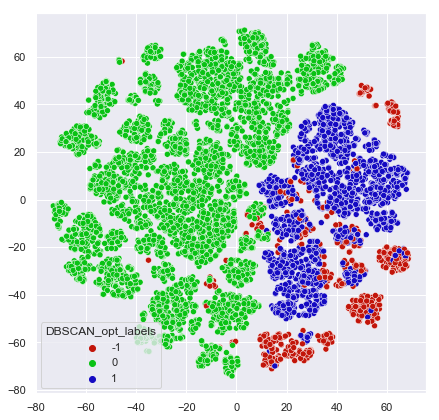

In [185]:
palette = sns.hls_palette(t['DBSCAN_opt_labels'].unique().shape[0], l=.4, s=.9) # цвета
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=X_tsne[:8000][:, 0], y=X_tsne[:8000][:, 1], hue=t['DBSCAN_opt_labels'], palette=palette, ax=ax);

In [186]:
silhouette_score(X=X_train[:5000], labels=t['DBSCAN_opt_labels'][:5000])

0.5091660428920507

In [187]:
function_data_grouping(dataindex=df[:8000].index, data=data, label_predictions=t['DBSCAN_opt_labels'], function=dictionary_function)

open      close        age marital_status  \
number_claster gender                                                   
-1             F        9.226190  90.773810  39.779762            MAR   
               M       13.902439  86.097561  35.948780            MAR   
 0             F       18.050408  81.949592  38.209044            MAR   
               M       19.585987  80.414013  36.388137            MAR   
 1             F        9.362550  90.637450  35.768924            MAR   
               M       13.942308  86.057692  32.895192            MAR   

                      job_position    credit_sum  credit_month tariff_id  \
number_claster gender                                                      
-1             F               SPC  33233.690149     12.767857      1.99   
               M               SPC  35873.210634     12.446341      1.99   
 0             F               SPC  23486.555549     10.952928       1.1   
               M               SPC  23912.951003     10.880175       1.1   
 1             F               SPC  27243.863526     10.353586       1.6   
               M               SPC  26735.805567     10.292308       1.6   

                       score_shk education    living_region  monthly_income  \
number_claster gender                                                         
-1             F        0.434296       GRD  САНКТ ПЕТЕРБУРГ    38627.976190   
               M        0.449116       GRD       МОСКОВСКАЯ    49670.731707   
 0             F        0.434336       GRD       МОСКОВСКАЯ    33437.361008   
               M        0.427732       SCH       МОСКОВСКАЯ    41692.675159   
 1             F        0.558105       SCH       МОСКОВСКАЯ    32994.023904   
               M        0.563640       SCH       МОСКОВСКАЯ    38702.884615   

                       credit_count  overdue_credit_count  
number_claster gender                                      
-1             F                1.0                   0.0  
               M                1.0                   0.0  
 0             F                1.0                   0.0  
               M                1.0                   0.0  
 1             F                1.0                   0.0  
               M                1.0                   0.0

In [ ]:
# def color_generator(argument, n):
#         label_1, label_2 = [],[]
#         for i in map(lambda x: x[0], argument):
#             if i[0] == 'F': label_1.append(i[1])
#             else: label_2.append(i[1])
#         return [
#             plt.get_cmap('Blues')(n-(n*i//4))
#             for i in range(len(label_1))] + [plt.get_cmap('Oranges')(n-(n*i//4))
#             for  i in range(len(label_2))]

# def cluster_properties(ac_k, ax):

#     size = 0.3

#     # !!Функция по генерации картежей!!
#     # функция будет зависить от того, сколько передается в нее объектов
#     # а в нутри будет рекурентный цикл

#     gender_ring = sorted([
#         ((i,), sum(ac_k.gender == i))
#         for i in ac_k.gender.unique()
#         ])

#     marital_status_ring = sorted([
#         ((j, i), ac_k[(ac_k.gender == j) & (ac_k.marital_status == i)].marital_status.shape[0])
#         for j in ac_k.gender.unique()
#         for i in ac_k[ac_k.gender==j].marital_status.unique()
#         ])

#     job_position_sum = sorted([
#         ((j, i, k),
#             ac_k[
#                 (ac_k.gender == j) &
#                 (ac_k.marital_status == i) &
#                 (ac_k.job_position == k)].job_position.shape[0])
#         for k in ac_k.job_position.unique()
#         for j in ac_k[ac_k.job_position == k].gender.unique()
#         for i in ac_k[(ac_k.gender==j) & (ac_k.job_position==k)].marital_status.unique()])

#     education_sum = sorted([
#         ((g, m, j, e), ac_k[
#                 (ac_k.gender == g) &
#                 (ac_k.marital_status == m) &
#                 (ac_k.job_position == j) &
#                 (ac_k.education == e)].education.shape[0])
#         for e in ac_k.education.unique()
#         for j in ac_k[ac_k.education == e].job_position.unique()
#         for g in ac_k[(ac_k.education == e) & (ac_k.job_position == j)].gender.unique()
#         for m in ac_k[
#                 (ac_k.education == e) 
#                 & (ac_k.job_position == j)
#                 & (ac_k.gender == g)].marital_status.unique()
#                 ])

#     # education
#     ax.pie(x=[i for i in map(lambda x: x[1], education_sum)],
#             radius=1.5,
#             colors=color_generator(education_sum, n=150),
#             wedgeprops=dict(width=size, edgecolor='w'),
#             labels=[i for i in map(lambda x: x[0][3], education_sum)],
#             labeldistance=0.8)

#     # job_position
#     ax.pie(x=[i for i in map(lambda x: x[1], job_position_sum)],
#         radius=1.5-size,
#         colors=color_generator(job_position_sum, n=210),
#         wedgeprops=dict(width=size, edgecolor='w'),
#         labels=[i for i in map(lambda x: x[0][2], job_position_sum)],
#         labeldistance=0.8)

#     # marital_status
#     ax.pie(x=[i[1] for i in marital_status_ring],
#             radius=1.5 - size*2,
#             colors=color_generator(marital_status_ring, n=240),
#             wedgeprops=dict(width=size, edgecolor='w'),
#             labels=[i[0][1] for i in marital_status_ring],
#             labeldistance=0.8)

#     # gender
#     ax.pie(x=[i[1] for i in gender_ring],
#         radius=1.5-size*3,
#         colors=[plt.get_cmap('Blues')(250), plt.get_cmap('Oranges')(250)],
#         wedgeprops=dict(width=size, edgecolor='w'),
#         labels = [i[0][0] for i in gender_ring],
#         labeldistance=0.9)

    

    

    
    # plt.show()

In [ ]:
# def color_generator(argument, n):
#         label_1, label_2 = [],[]
#         for i in map(lambda x: x[0], argument):
#             if i[0] == 'F': label_1.append(i[1])
#             else: label_2.append(i[1])
#         return [
#             plt.get_cmap('Blues')(n-(n*i//4))
#             for i in range(len(label_1))] + [plt.get_cmap('Oranges')(n-(n*i//4))
#             for  i in range(len(label_2))]

# fig, ax = plt.subplots(figsize=(10, 10))
# size = 0.3

#     # !!Функция по генерации картежей!!
#     # функция будет зависить от того, сколько передается в нее объектов
#     # а в нутри будет рекурентный цикл

# gender_ring = sorted([
#         ((i,), sum(ac_k.gender == i))
#         for i in ac_k.gender.unique()
#         ])

# marital_status_ring = sorted([
#         ((j, i), ac_k[(ac_k.gender == j) & (ac_k.marital_status == i)].marital_status.shape[0])
#         for j in ac_k.gender.unique()
#         for i in ac_k[ac_k.gender==j].marital_status.unique()
#         ])

# job_position_sum = sorted([
#         ((j, i, k),
#             ac_k[
#                 (ac_k.gender == j) &
#                 (ac_k.marital_status == i) &
#                 (ac_k.job_position == k)].job_position.shape[0])
#         for k in ac_k.job_position.unique()
#         for j in ac_k[ac_k.job_position == k].gender.unique()
#         for i in ac_k[(ac_k.gender==j) & (ac_k.job_position==k)].marital_status.unique()])

# education_sum = sorted([
#         ((g, m, j, e), ac_k[
#                 (ac_k.gender == g) &
#                 (ac_k.marital_status == m) &
#                 (ac_k.job_position == j) &
#                 (ac_k.education == e)].education.shape[0])
#         for e in ac_k.education.unique()
#         for j in ac_k[ac_k.education == e].job_position.unique()
#         for g in ac_k[(ac_k.education == e) & (ac_k.job_position == j)].gender.unique()
#         for m in ac_k[
#                 (ac_k.education == e) 
#                 & (ac_k.job_position == j)
#                 & (ac_k.gender == g)].marital_status.unique()
#                 ])

#     # education
# ax.pie(x=[i for i in map(lambda x: x[1], education_sum)],
#             radius=1.5,
#             colors=color_generator(education_sum, n=150),
#             wedgeprops=dict(width=size, edgecolor='w'),
#             labels=[i for i in map(lambda x: x[0][3], education_sum)],
#             labeldistance=0.8)

#     # job_position
# ax.pie(x=[i for i in map(lambda x: x[1], job_position_sum)],
#         radius=1.5-size,
#         colors=color_generator(job_position_sum, n=210),
#         wedgeprops=dict(width=size, edgecolor='w'),
#         labels=[i for i in map(lambda x: x[0][2], job_position_sum)],
#         labeldistance=0.8)

#     # marital_status
# ax.pie(x=[i[1] for i in marital_status_ring],
#             radius=1.5 - size*2,
#             colors=color_generator(marital_status_ring, n=240),
#             wedgeprops=dict(width=size, edgecolor='w'),
#             labels=[i[0][1] for i in marital_status_ring],
#             labeldistance=0.8)

#     # gender
# ax.pie(x=[i[1] for i in gender_ring],
#         radius=1.5-size*3,
#         colors=[plt.get_cmap('Blues')(250), plt.get_cmap('Oranges')(250)],
#         wedgeprops=dict(width=size, edgecolor='w'),
#         labels = [i[0][0] for i in gender_ring],
#         labeldistance=0.9)

# plt.show();